In [1]:
# Import neccessary libraries
import pandas as pd

# Change a few settings to be more to my liking
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [2]:
# Read in the data
student = pd.read_csv('student.csv')

In [3]:
# Check out the data
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Check for nulls
student.isnull().sum().sort_values(ascending=False).head()

Parental_Education_Level    90
Teacher_Quality             78
Distance_from_Home          67
Hours_Studied                0
Attendance                   0
dtype: int64

In [5]:
# Check out the shape of the dataset
student.shape

(6607, 20)

In [6]:
# Drop the nulls
student = student.dropna()

In [7]:
# Make sure the nulls were successfully dropped
student.isnull().sum().sort_values(ascending=False).head()

Hours_Studied               0
Attendance                  0
Gender                      0
Distance_from_Home          0
Parental_Education_Level    0
dtype: int64

In [8]:
# Check out the new shape of the dataset
student.shape

(6378, 20)

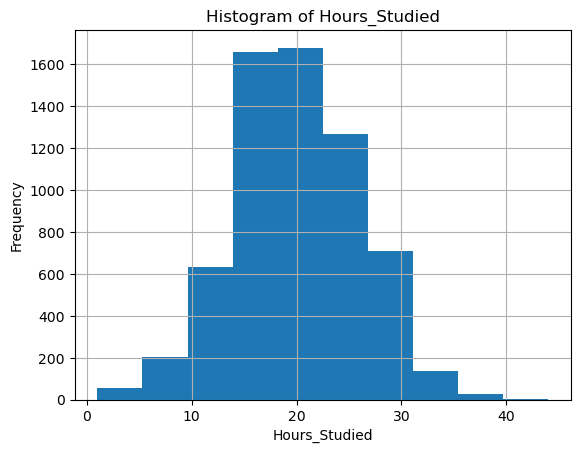

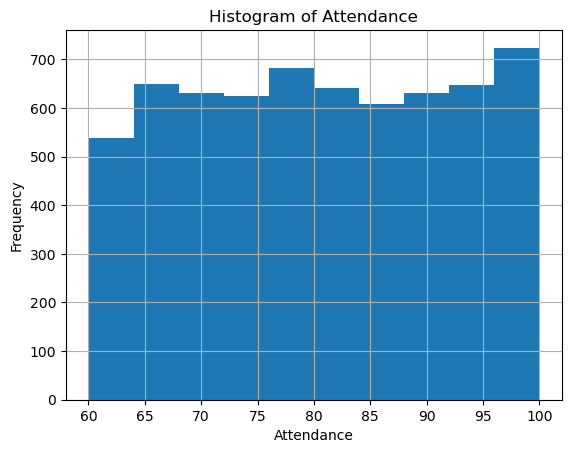

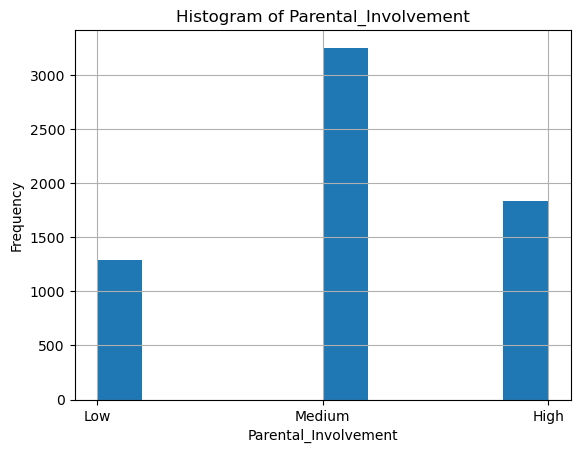

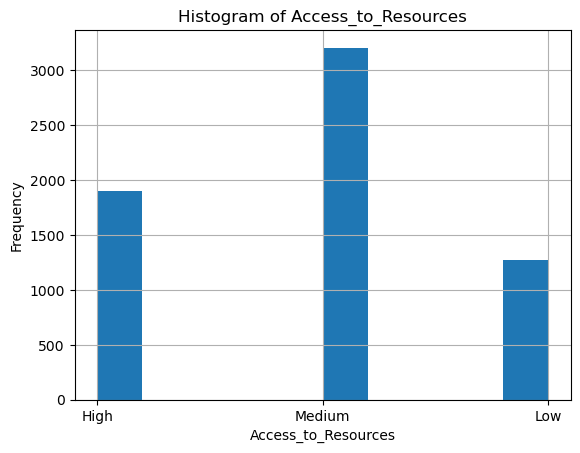

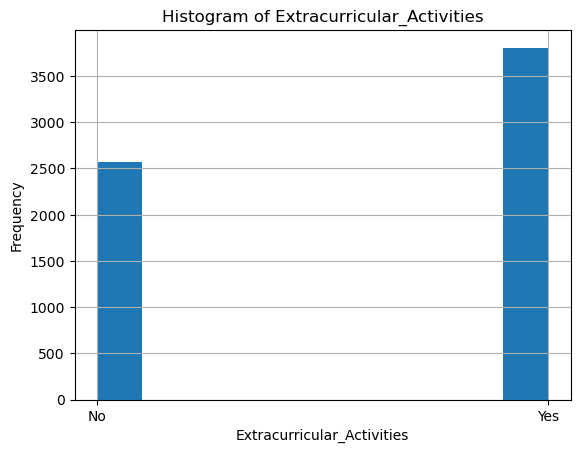

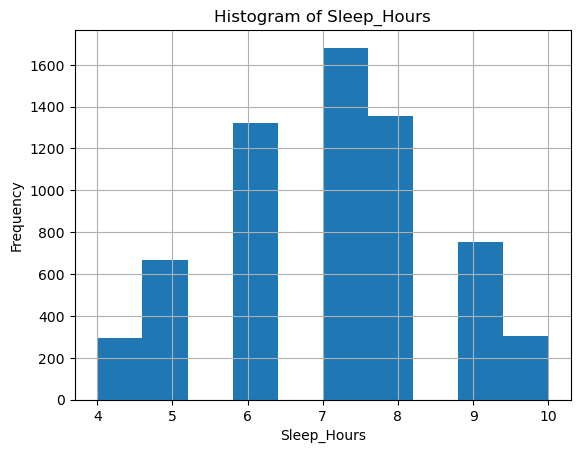

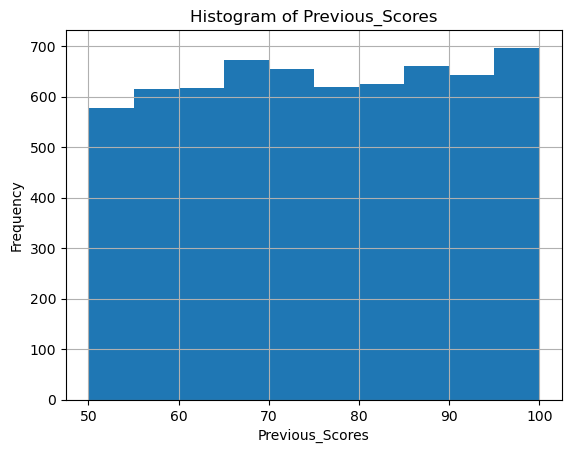

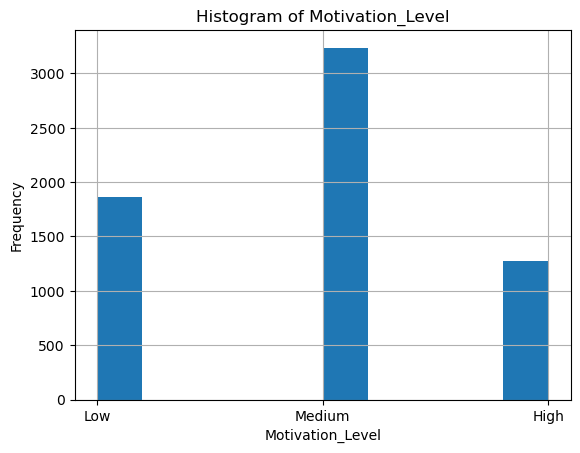

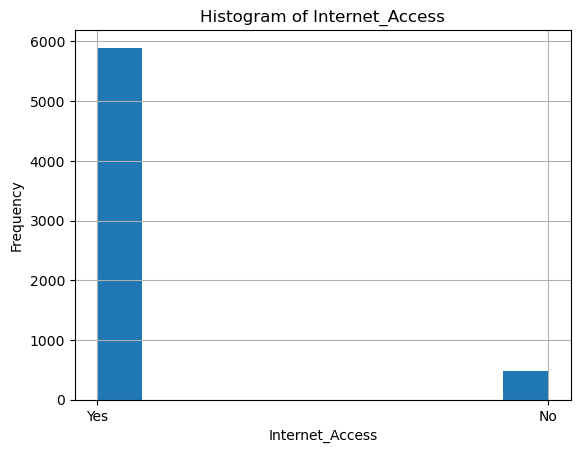

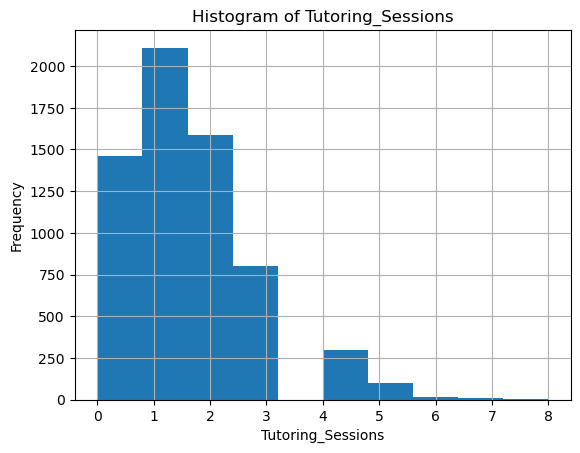

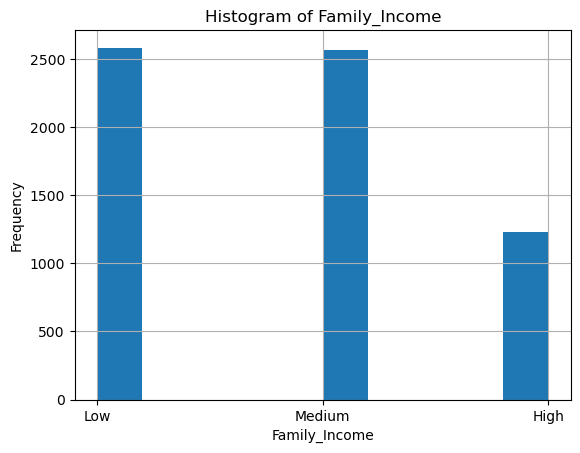

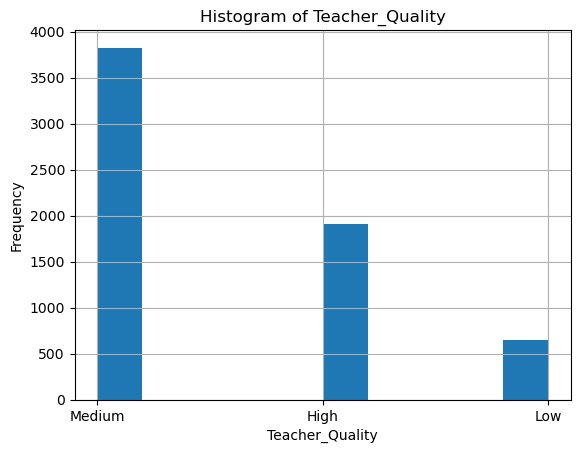

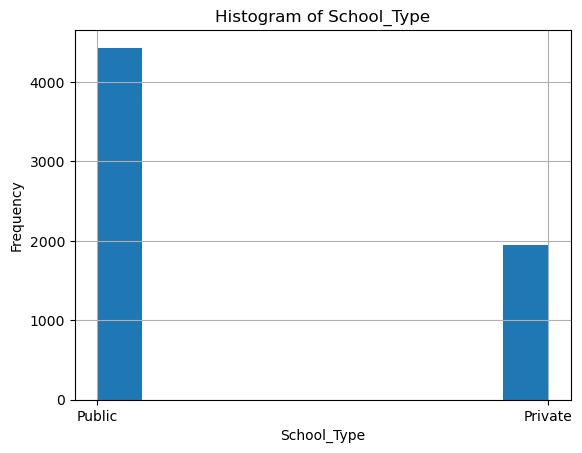

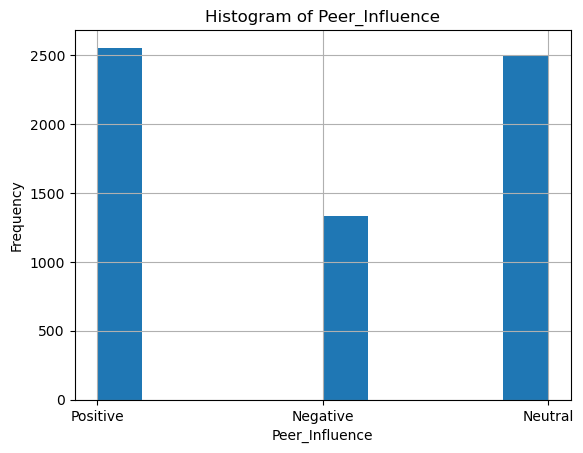

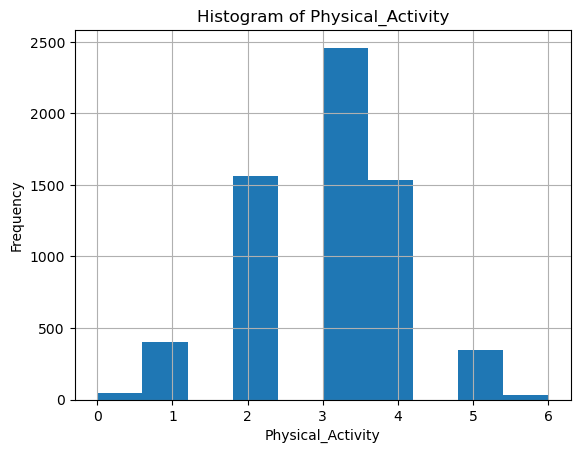

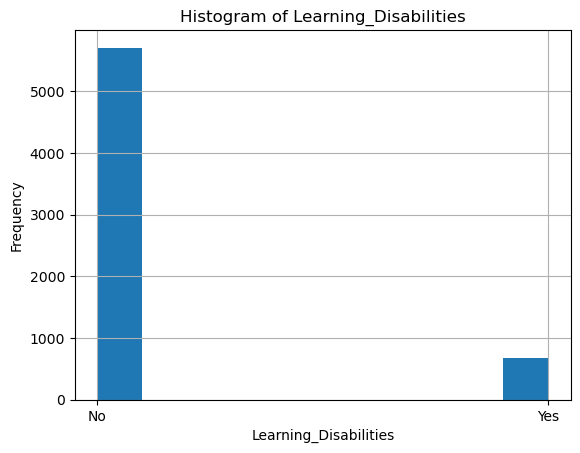

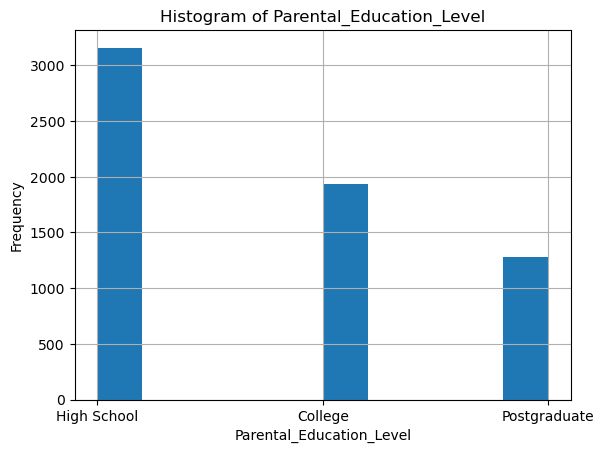

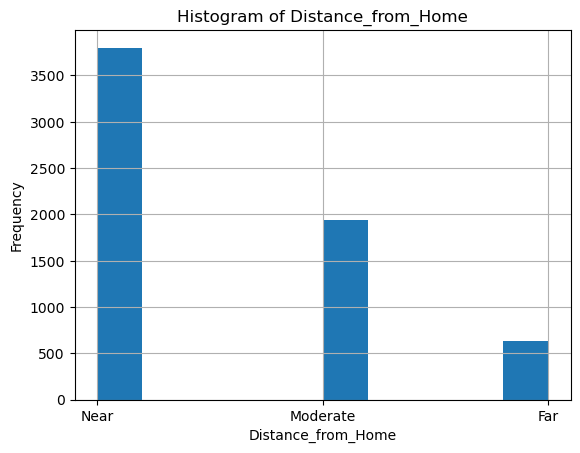

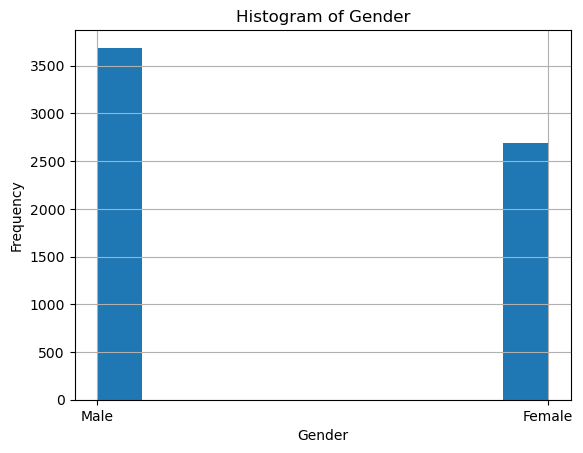

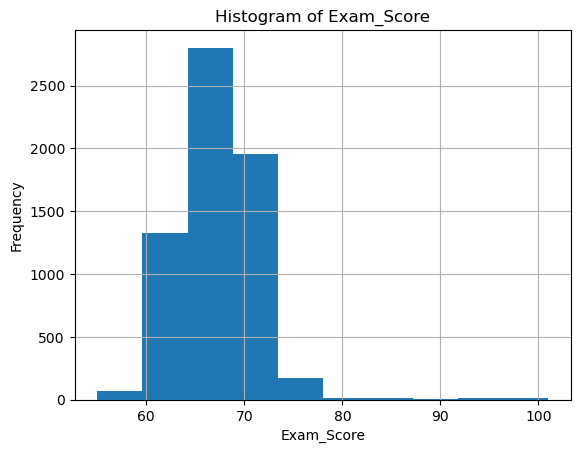

In [9]:
# Import neccessary libraries
import matplotlib.pyplot as plt

# Create a histogram for each variable, so it can be investigated
for column in student.columns:
    plt.figure()
    student[column].hist(bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Drop columns with huge data skews
student.drop(columns= ['Learning_Disabilities', 'Internet_Access'], inplace=True)

In [11]:
# Check for the quartiles of 'Exam_Score'
student['Exam_Score'].describe()

count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [12]:
# Check out the values counts of 'Exam_Score'
student['Exam_Score'].value_counts()

Exam_Score
68     738
66     722
67     692
65     650
69     599
70     526
64     478
71     398
63     350
72     298
62     261
61     166
73     133
74     102
60      75
75      48
59      39
58      21
76      16
80       5
77       5
57       4
82       4
94       4
86       4
78       4
84       3
97       3
89       3
79       3
88       3
98       3
93       2
92       2
95       2
99       2
87       2
96       1
85       1
91       1
100      1
83       1
101      1
55       1
56       1
Name: count, dtype: int64

In [13]:
# Generate a new Boolean column named 'Target' indicating whether each value exceeds a certain percentage threshold
student['Top_Student'] = student['Exam_Score'].apply(lambda x: 'Yes' if x > 69 else 'No')

In [14]:
# Check out the dataset
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Top_Student
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,Positive,3,High School,Near,Male,67,No
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,Negative,4,College,Moderate,Female,61,No
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,Neutral,4,Postgraduate,Near,Male,74,Yes
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,Negative,4,High School,Moderate,Male,71,Yes
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,Neutral,4,College,Near,Female,70,Yes


In [15]:
# Create a copy of the student DataFrame to avoid changing the original
bools = student.copy()

# Map 'Yes' to 1 and 'No' to 0 in the copy
bools['Top_Student'] = student['Top_Student'].map({'Yes': 1, 'No': 0})

# Now select only numerical columns
numerical_cols = bools.select_dtypes(include='number')

# Compute correlation with 'Top_Student' and drop the correlation with 'Top_Student' and 'Exam_Score'
correlations = numerical_cols.corr()['Top_Student'].drop(['Top_Student', 'Exam_Score']).sort_values(ascending=False)

print(correlations)

Attendance           0.495769
Hours_Studied        0.372900
Previous_Scores      0.149376
Tutoring_Sessions    0.124466
Physical_Activity    0.021929
Sleep_Hours         -0.001553
Name: Top_Student, dtype: float64


In [16]:
# Double check the variables types of the dataset
student.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
Top_Student                   object
dtype: object

In [17]:
# Drop 'Exam_Score'
student.drop(columns='Exam_Score', inplace=True)

In [18]:
# Convert all other categorical columns to boolean using one-hot encoding
student2 = pd.get_dummies(student)

In [19]:
# Check out the dataset
student2.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Private,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male,Top_Student_No,Top_Student_Yes
0,23,84,7,73,0,3,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,True,True,False
1,19,64,8,59,2,4,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False
2,24,98,7,91,2,4,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False,True
3,29,89,8,98,1,4,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True,False,True
4,19,92,6,65,3,4,False,False,True,False,False,True,False,True,False,False,True,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True


In [21]:
# Ensure the variables were correctly changed
student2.dtypes

Hours_Studied                            int64
Attendance                               int64
Sleep_Hours                              int64
Previous_Scores                          int64
Tutoring_Sessions                        int64
Physical_Activity                        int64
Parental_Involvement_High                 bool
Parental_Involvement_Low                  bool
Parental_Involvement_Medium               bool
Access_to_Resources_High                  bool
Access_to_Resources_Low                   bool
Access_to_Resources_Medium                bool
Extracurricular_Activities_No             bool
Extracurricular_Activities_Yes            bool
Motivation_Level_High                     bool
Motivation_Level_Low                      bool
Motivation_Level_Medium                   bool
Family_Income_High                        bool
Family_Income_Low                         bool
Family_Income_Medium                      bool
Teacher_Quality_High                      bool
Teacher_Quali

In [22]:
# Check out the new shape of the dataset
student2.shape

(6378, 38)

In [23]:
# Compute the correlation each column has with the target, rounded to 6 decimal places
correlation = student2.drop(['Top_Student_No'], axis=1).corr()['Top_Student_Yes'].round(6)
correlation = correlation.drop('Top_Student_Yes').sort_values(ascending=False)

num_rows, num_columns = student2.shape
print(f"Currently, {num_rows} students are being analyzed, based on {num_columns} datapoints.")
print()
print(correlation)

Currently, 6378 students are being analyzed, based on 38 datapoints.

Attendance                               0.495769
Hours_Studied                            0.372900
Previous_Scores                          0.149376
Access_to_Resources_High                 0.142935
Tutoring_Sessions                        0.124466
Parental_Involvement_High                0.107377
Peer_Influence_Positive                  0.077191
Distance_from_Home_Near                  0.076068
Parental_Education_Level_Postgraduate    0.073173
Teacher_Quality_High                     0.058538
Motivation_Level_High                    0.057579
Family_Income_High                       0.050716
Extracurricular_Activities_Yes           0.038722
Family_Income_Medium                     0.025867
Physical_Activity                        0.021929
Parental_Education_Level_College         0.021594
School_Type_Private                      0.009557
Motivation_Level_Medium                  0.004795
Gender_Female                 

In [24]:
# Extract feature columns by dropping the 'Top_Student_No' and 'Top_Student_Yes' columns
feature_cols = student2.drop(['Top_Student_No', 'Top_Student_Yes'], axis=1).columns.tolist()

In [25]:
# Extract features (independent variables) from student2
x = student2[feature_cols]

# Extract target variable (dependent variable) from student2
y = student2['Top_Student_Yes']

              precision    recall  f1-score   support

       False       0.96      0.64      0.77      4797
        True       0.46      0.92      0.61      1581

    accuracy                           0.71      6378
   macro avg       0.71      0.78      0.69      6378
weighted avg       0.84      0.71      0.73      6378



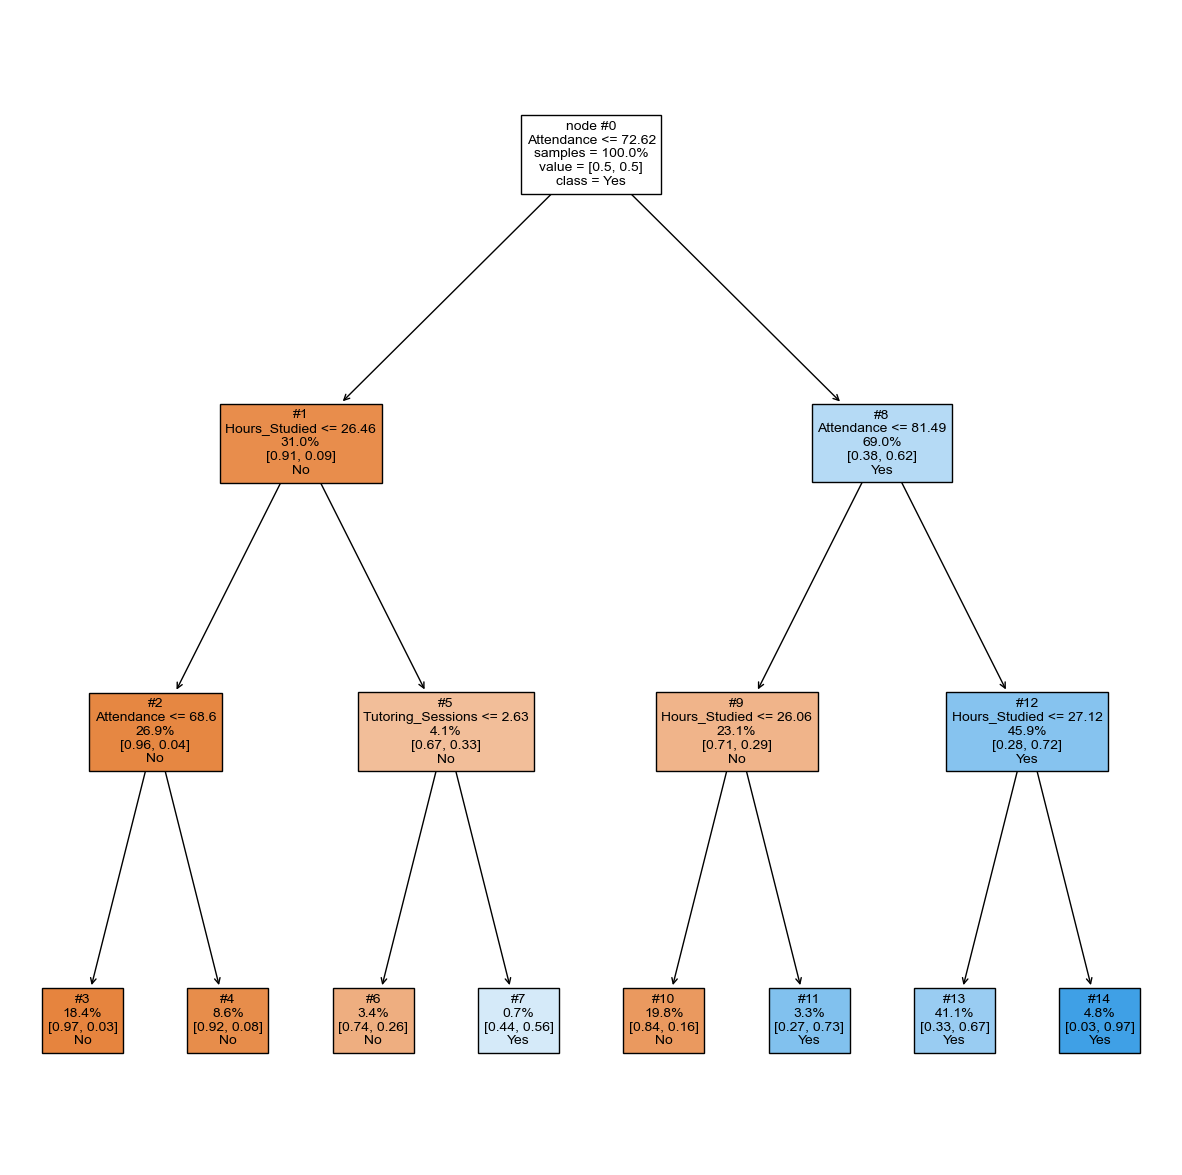

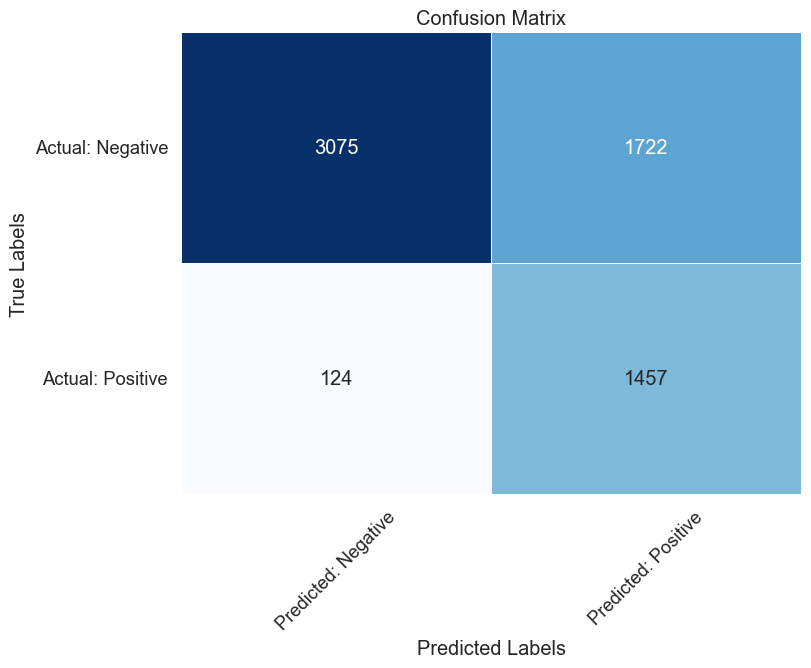

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define function to train the model
def train_model(d=3, cw='balanced', c='gini', s='random', msl=3):
    # Instantiate the Decision Tree classifier
    clf = DecisionTreeClassifier(max_depth=d,
                                 class_weight=cw,
                                 criterion=c,
                                 splitter=s,
                                 min_samples_leaf=msl)

    # Train the classifier
    clf.fit(x, y)

    # Plot the decision tree
    plt.figure(figsize=(15, 15))
    plot_tree(clf, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True, precision=2, node_ids=True, fontsize=10, label='root', proportion=True, impurity=False)

    # Predict on the test set
    prediction = clf.predict(x)

    # Print classification report
    print(metrics.classification_report(y, prediction))
    
    # Predict probabilities
    probabilities = clf.predict_proba(x)[:, 1]

    return clf, probabilities

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted: Negative', 'Predicted: Positive'], 
                yticklabels=['Actual: Negative', 'Actual: Positive'], 
                linewidths=.5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Train the model
trained_model, probabilities = train_model()

# Plot confusion matrix with adjusted labels
conf_matrix = metrics.confusion_matrix(y, trained_model.predict(x))
plot_confusion_matrix(conf_matrix)